In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
file_path = '/content/kidney_disease_updated.csv'
data = pd.read_csv(file_path)

In [22]:
# Check the shape and structure
print(data.shape)
print(data.info())

# First few rows
print(data.head())


(230, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              230 non-null    int64  
 1   age             230 non-null    float64
 2   bp              230 non-null    float64
 3   sg              230 non-null    float64
 4   al              230 non-null    float64
 5   su              230 non-null    float64
 6   rbc             230 non-null    int64  
 7   pc              230 non-null    int64  
 8   pcc             230 non-null    int64  
 9   ba              230 non-null    int64  
 10  bgr             230 non-null    float64
 11  bu              230 non-null    float64
 12  sc              230 non-null    float64
 13  sod             230 non-null    float64
 14  pot             230 non-null    float64
 15  hemo            230 non-null    float64
 16  pcv             230 non-null    float64
 17  wc              230 non-n

In [13]:
# Descriptive statistics
print(data.describe(include='all'))


               id         age          bp          sg          al          su  \
count  230.000000  230.000000  230.000000  230.000000  230.000000  230.000000   
mean   229.717391   51.347826   76.956522    1.017913    0.904348    0.413043   
std     89.531450   18.004872   12.445438    0.005368    1.357328    1.040156   
min    100.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%    157.250000   41.250000   70.000000    1.015000    0.000000    0.000000   
50%    214.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    271.750000   65.000000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  120.000000    1.025000    5.000000    5.000000   

              rbc          pc         pcc          ba  ...         pcv  \
count  230.000000  230.000000  230.000000  230.000000  ...  230.000000   
mean     0.873913    0.813043    0.095652    0.069565  ...   38.921739   
std      0.332671    0.390727    0.294755    0.2

In [14]:
# Check for missing values
print(data.isnull().sum())


id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [15]:
# Check datatypes and unique values
print(data.dtypes)
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")


id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                  int64
rc                  int64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object
id: 230 unique values
age: 70 unique values
bp: 8 unique values
sg: 5 unique values
al: 6 unique values
su: 6 unique values
rbc: 2 unique values
pc: 2 unique values
pcc: 2 unique values
ba: 2 unique values
bgr: 119 unique values
bu: 96 unique values
sc: 65 unique values
sod: 29 unique values
pot: 35 unique va

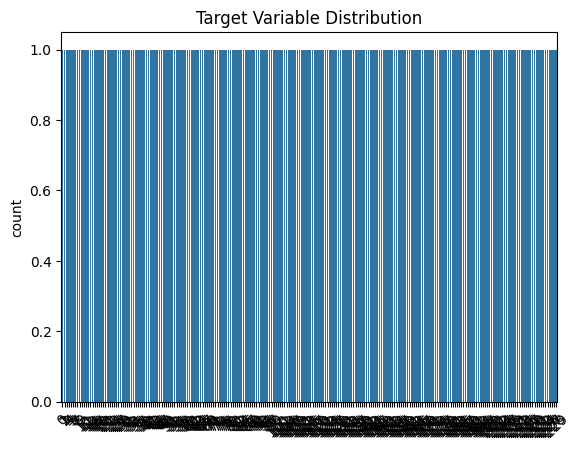

In [16]:
# 'classification' or similar is the target
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data['classification'])
plt.title('Target Variable Distribution')
plt.xticks(rotation=45)
plt.show()


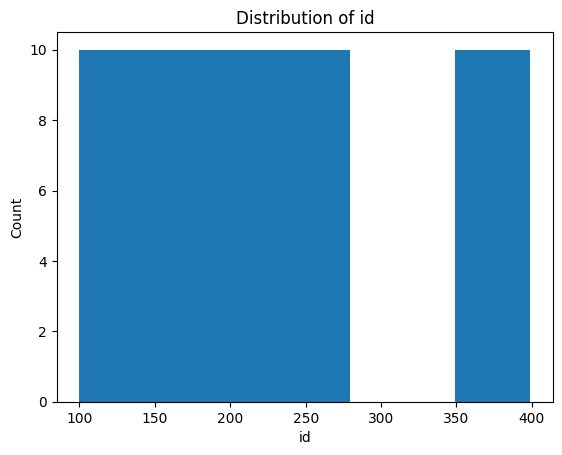

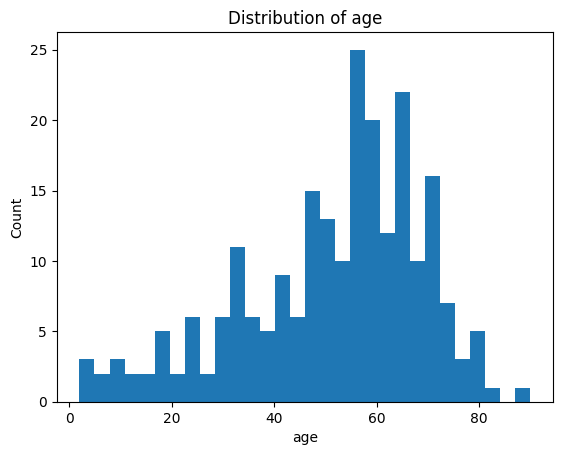

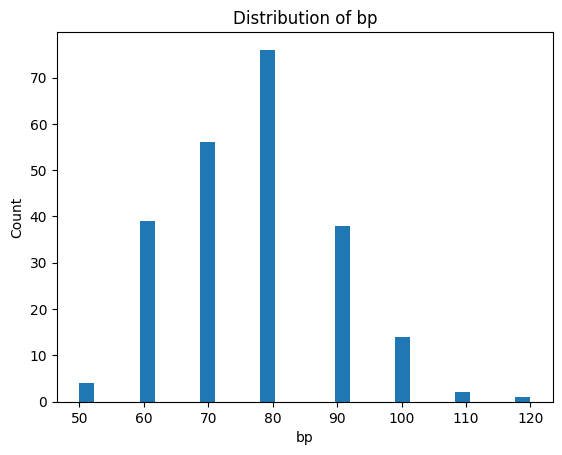

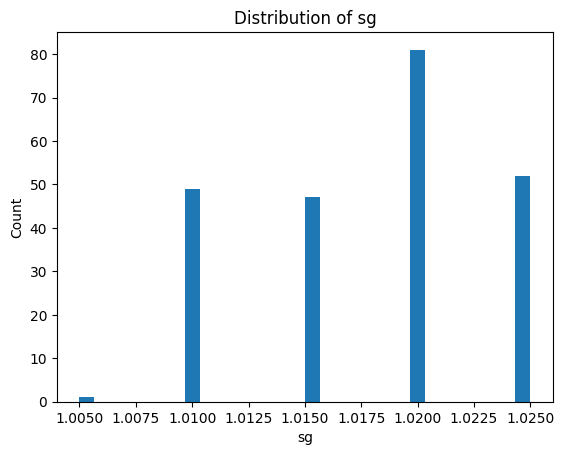

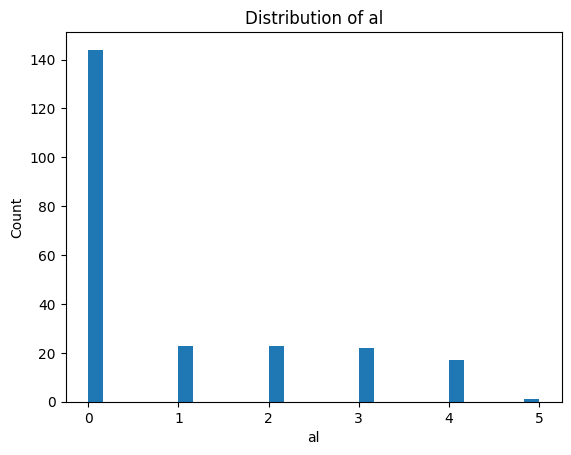

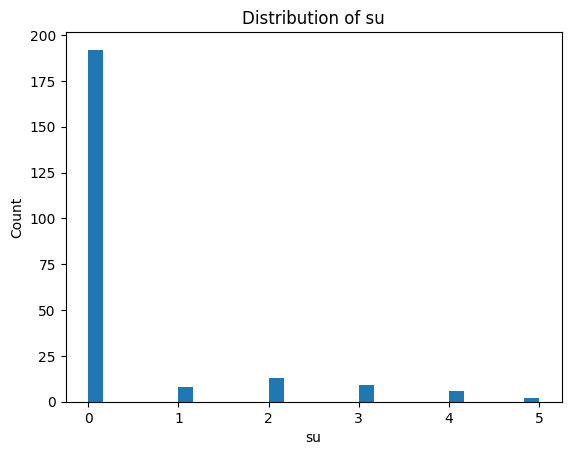

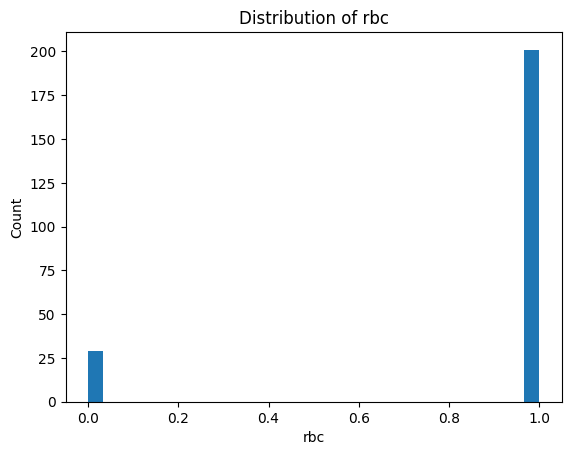

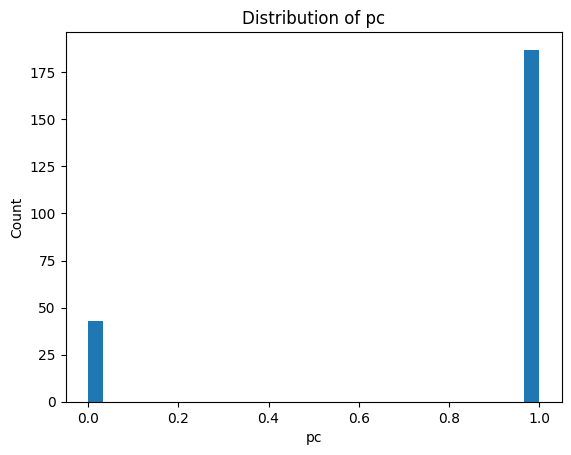

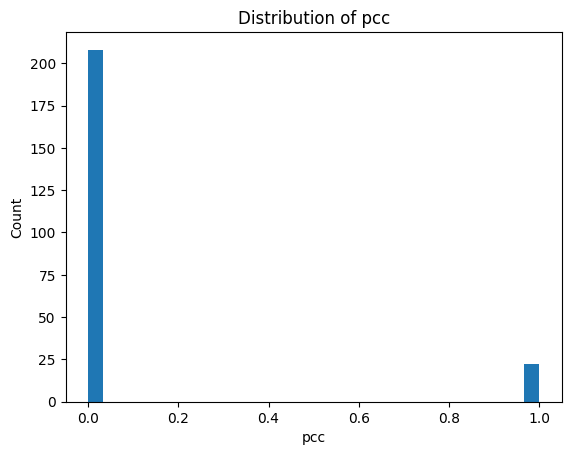

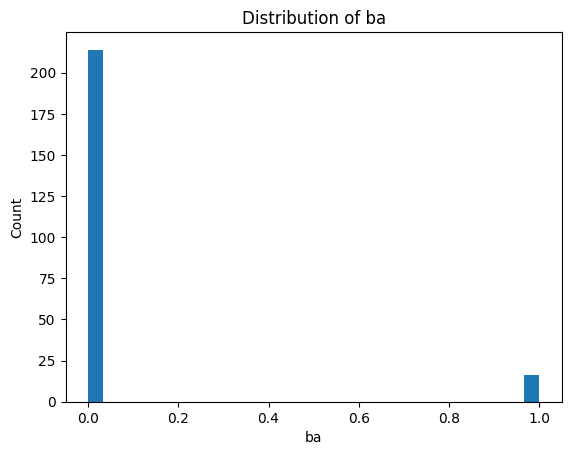

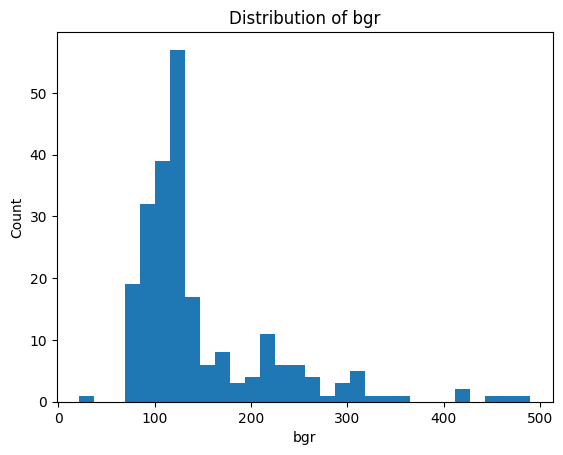

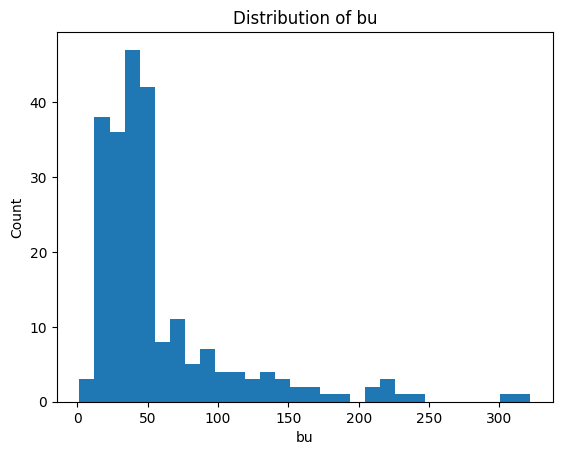

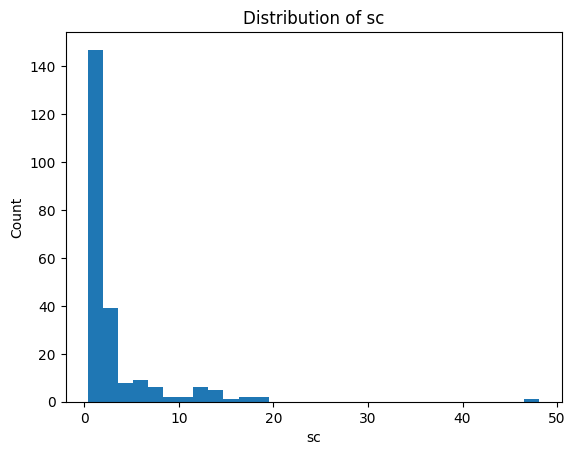

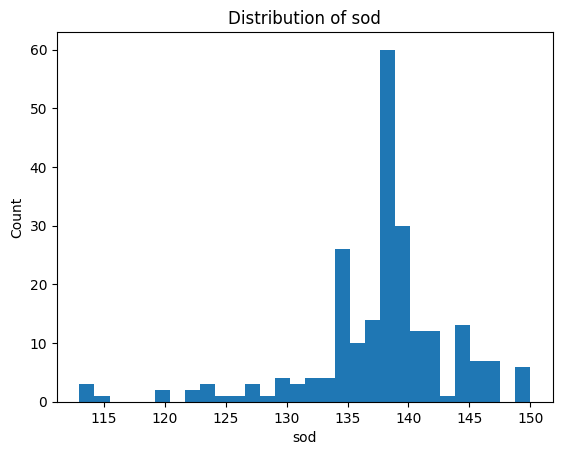

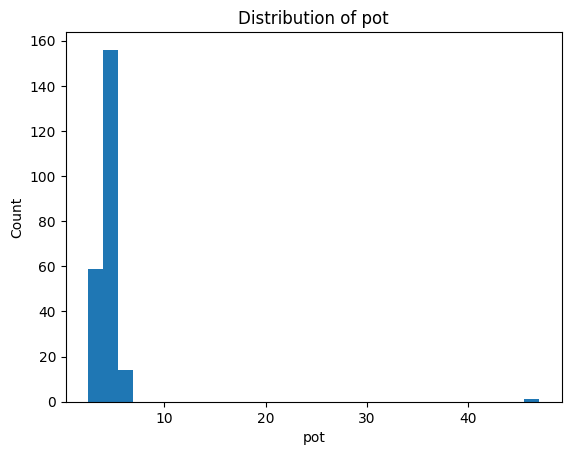

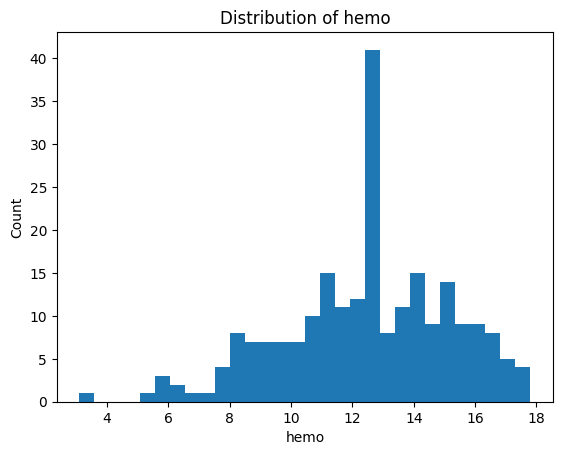

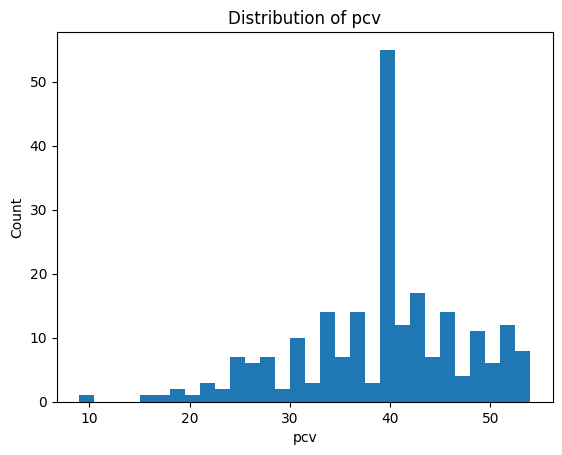

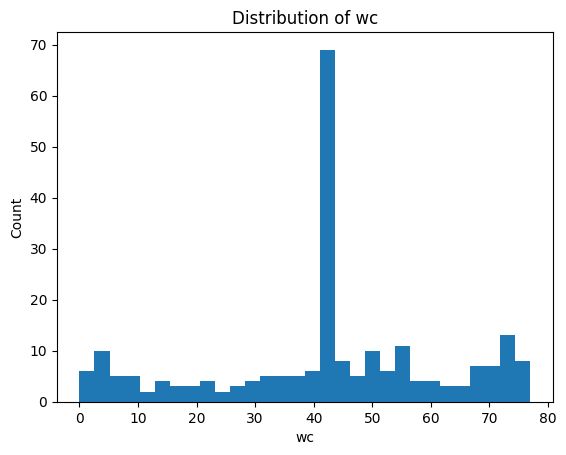

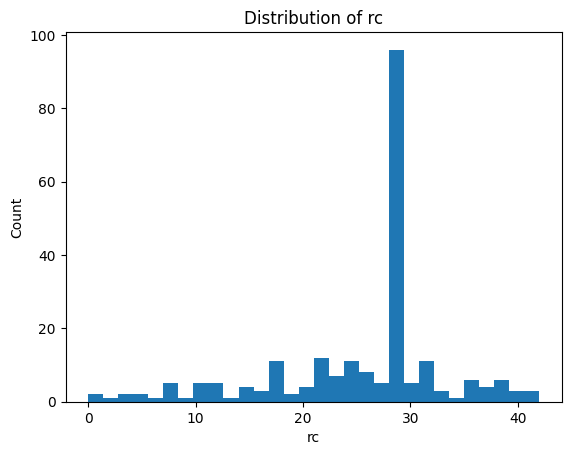

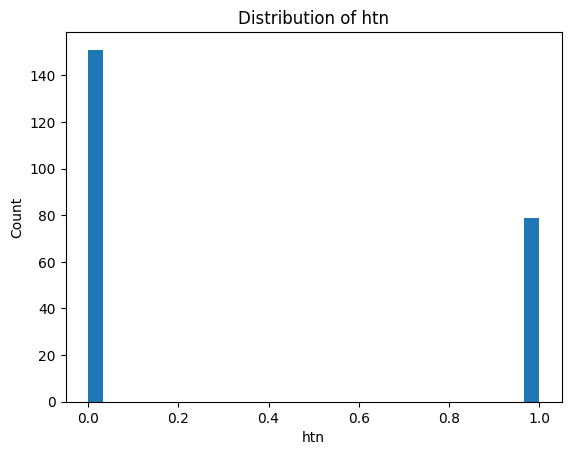

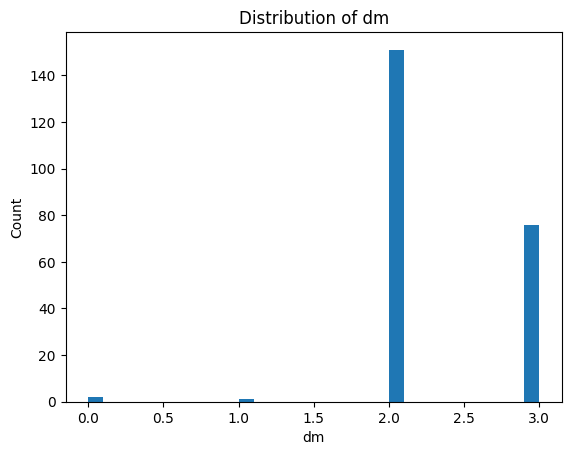

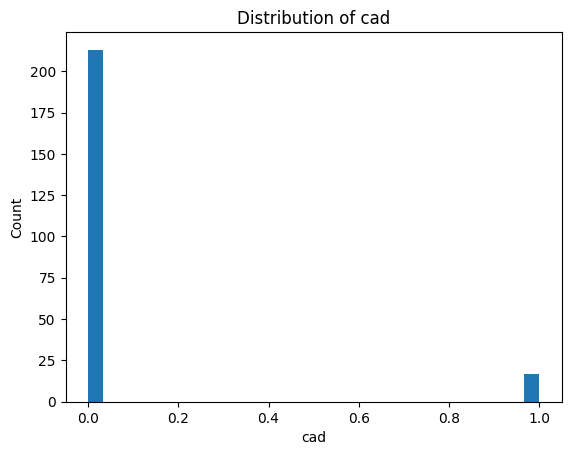

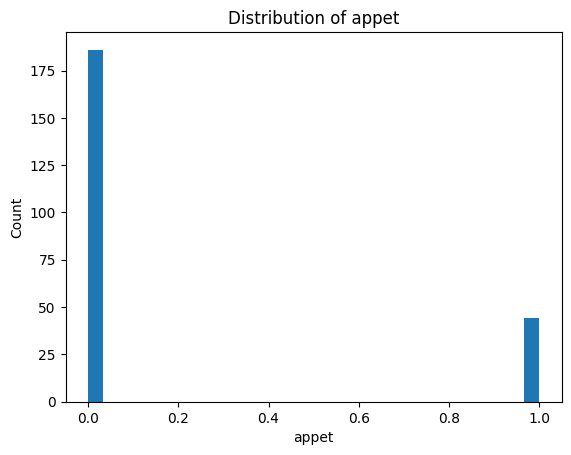

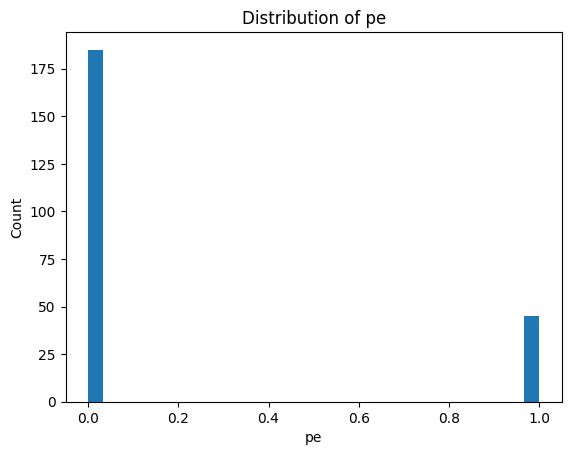

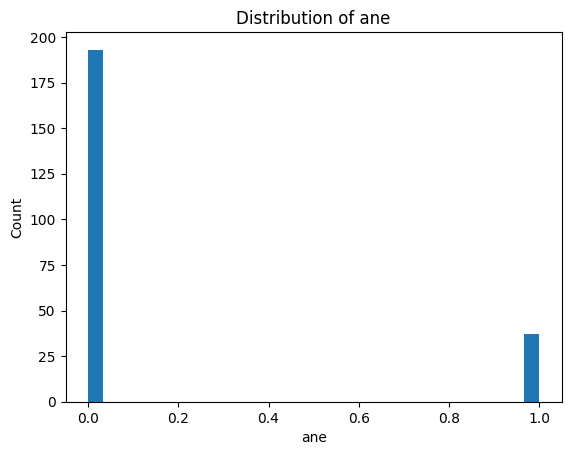

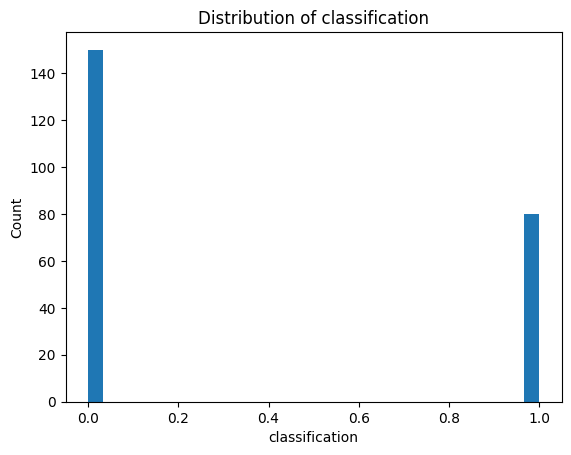

In [17]:
# Histograms for numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.hist(data[col].dropna(), bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


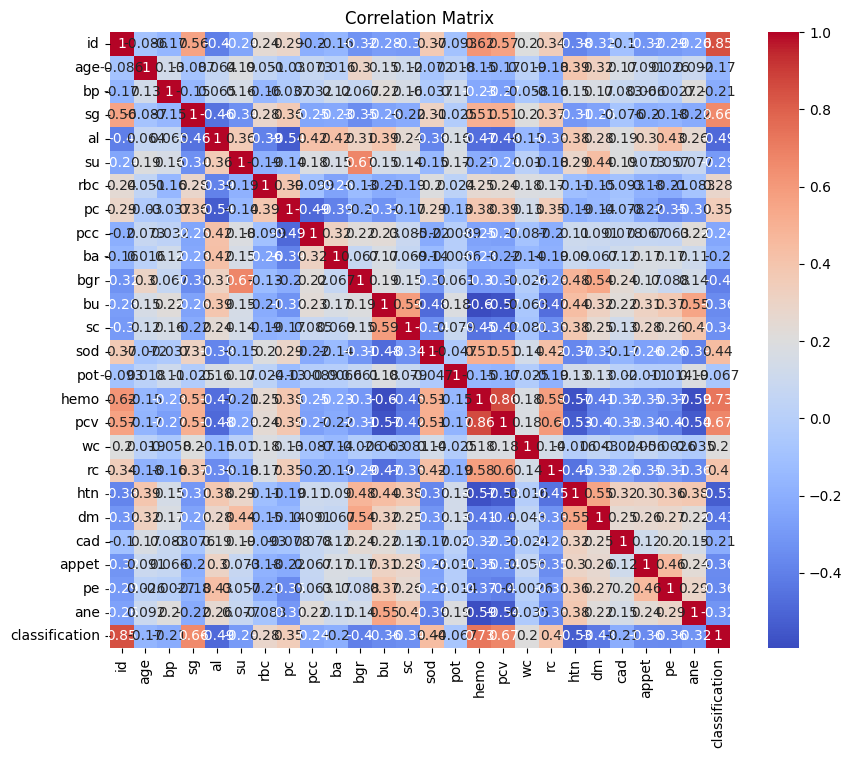

In [18]:
# Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


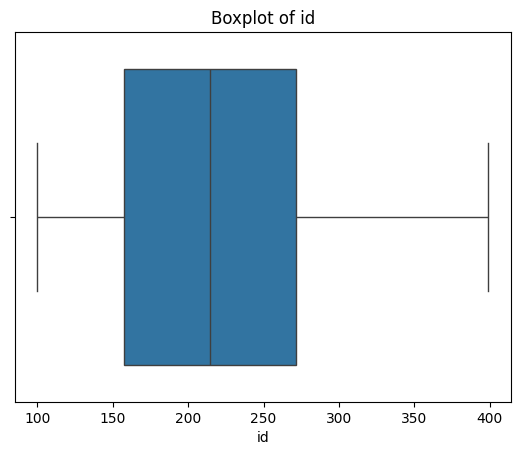

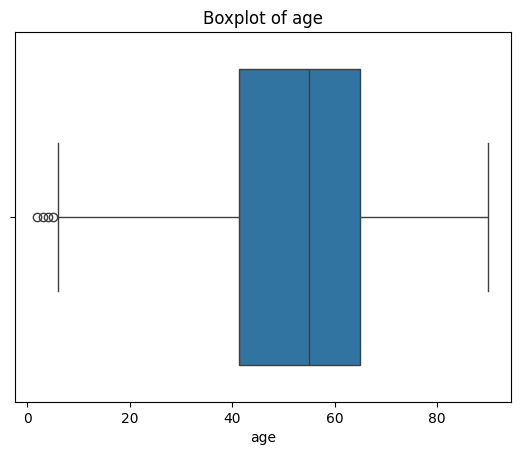

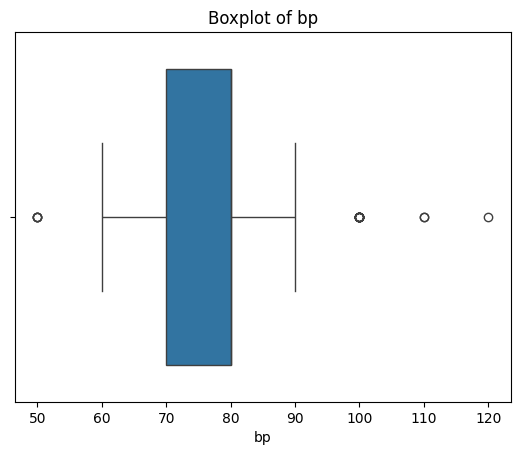

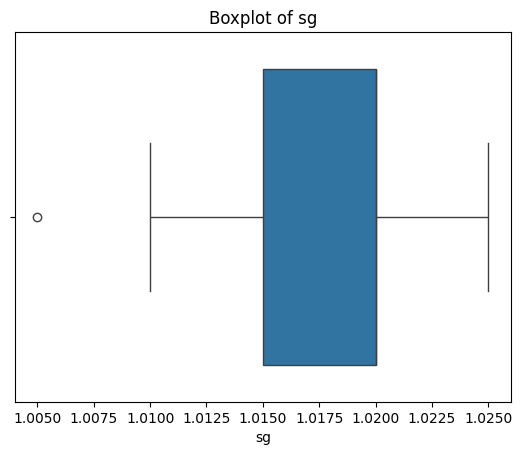

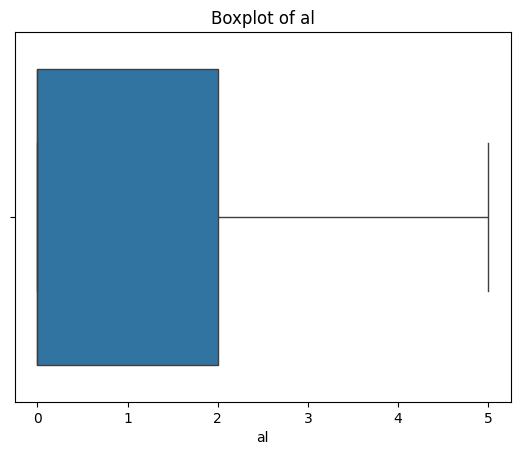

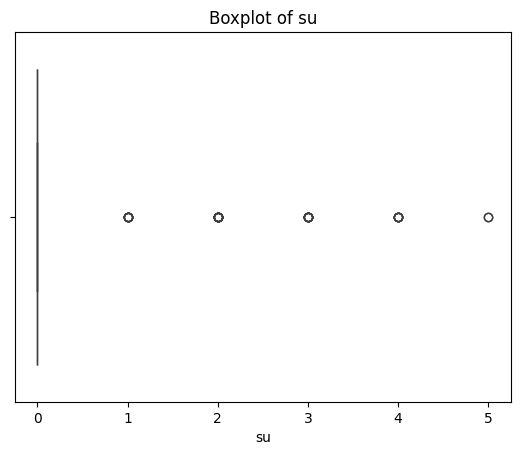

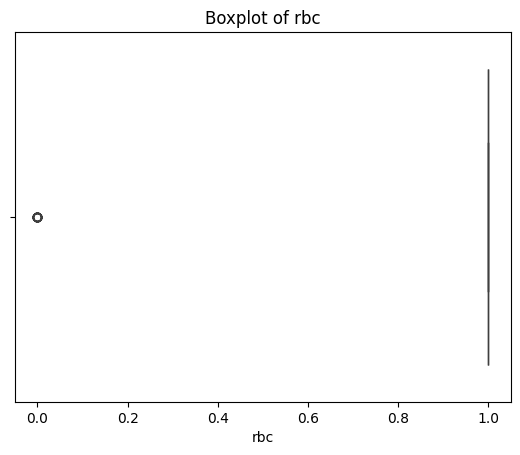

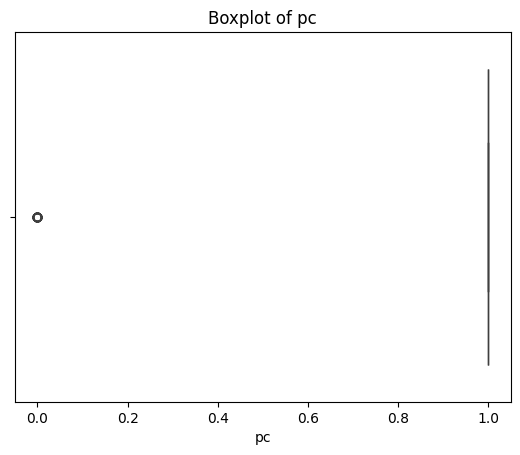

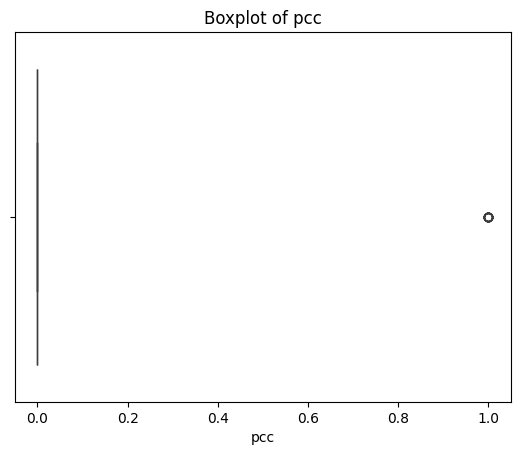

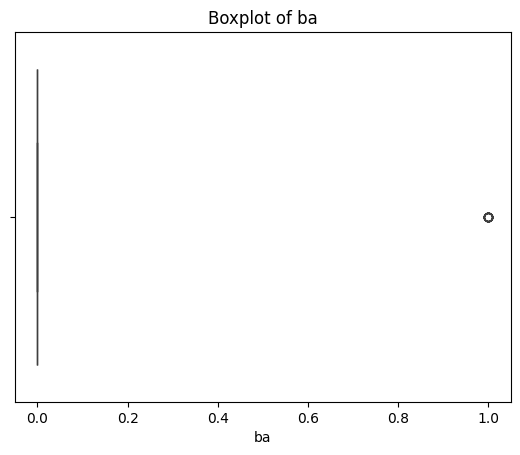

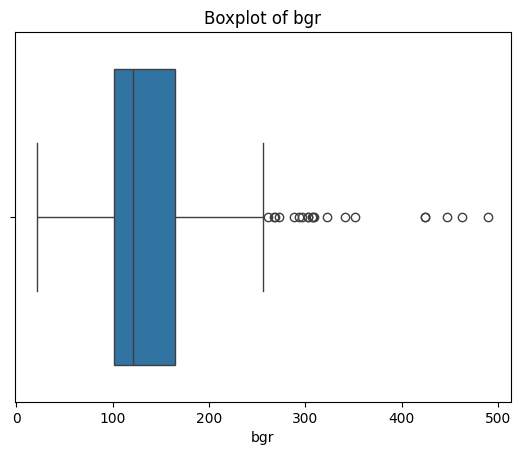

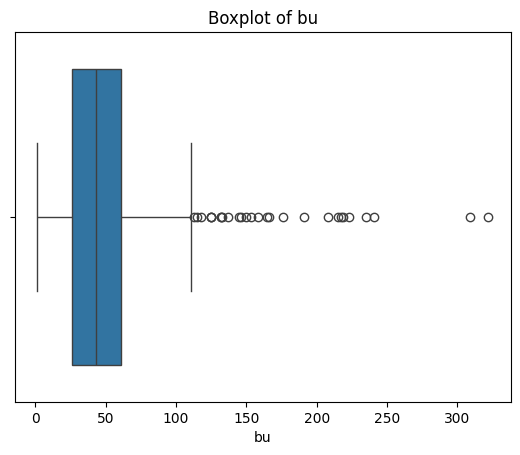

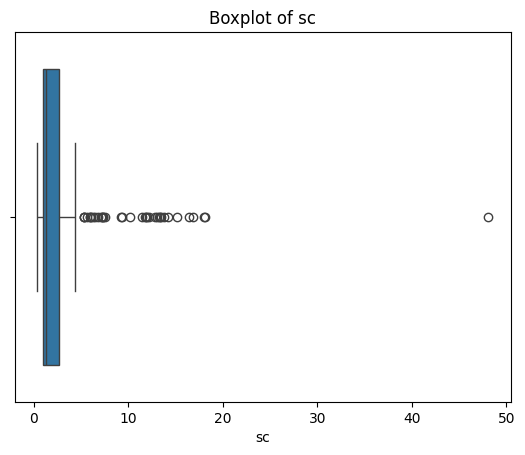

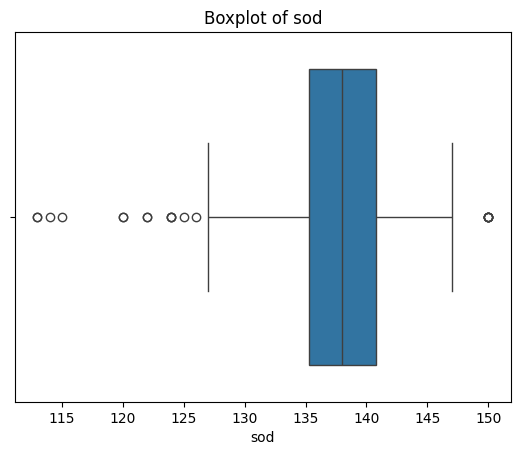

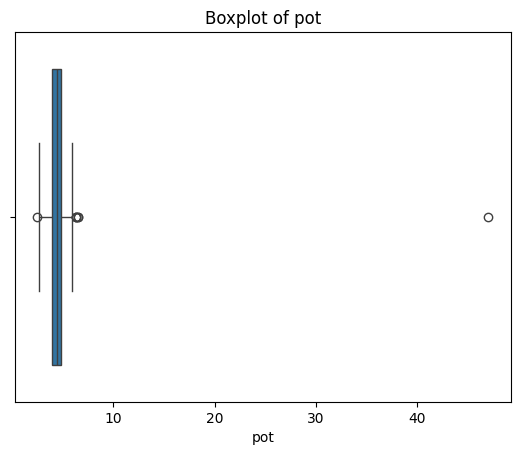

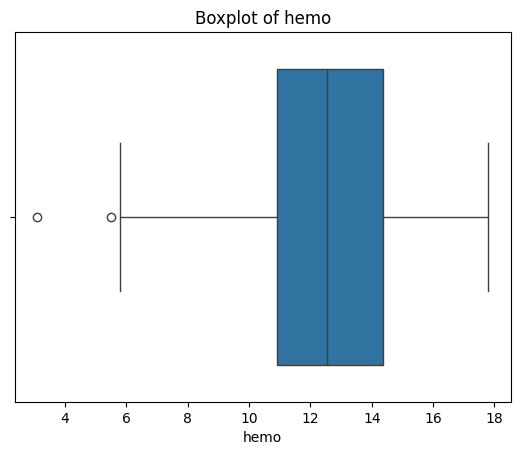

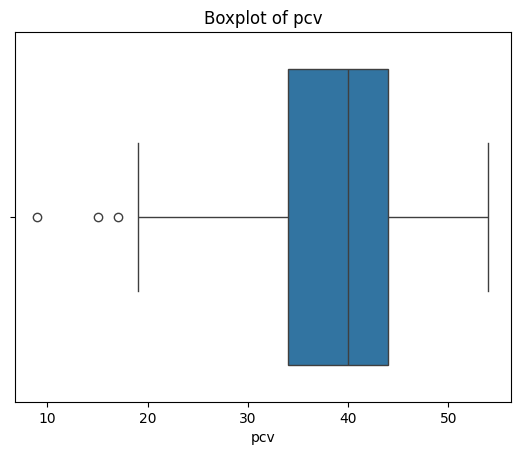

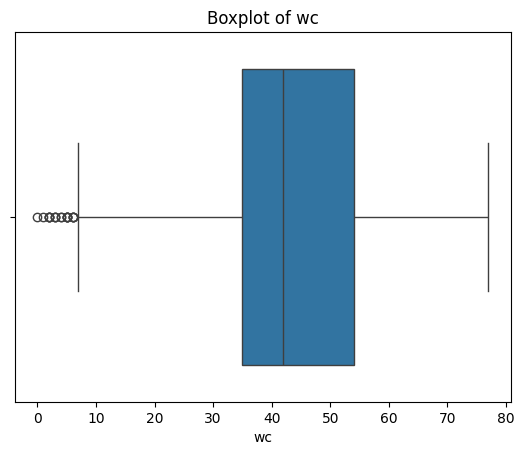

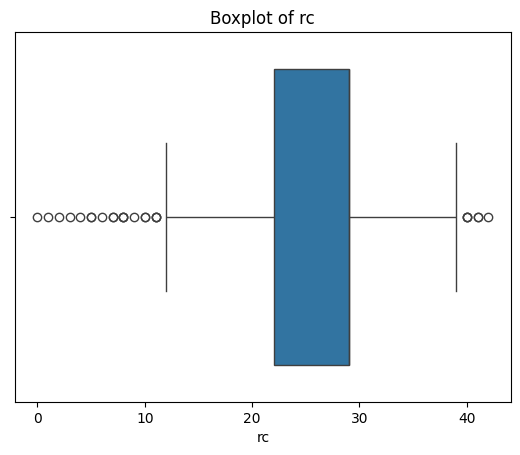

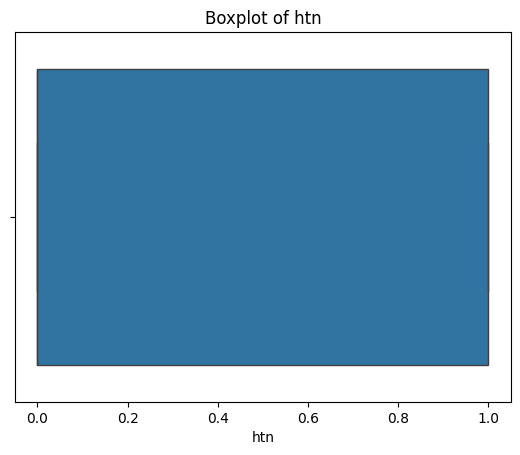

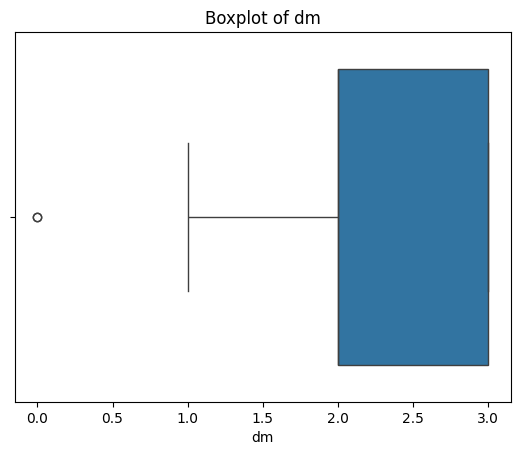

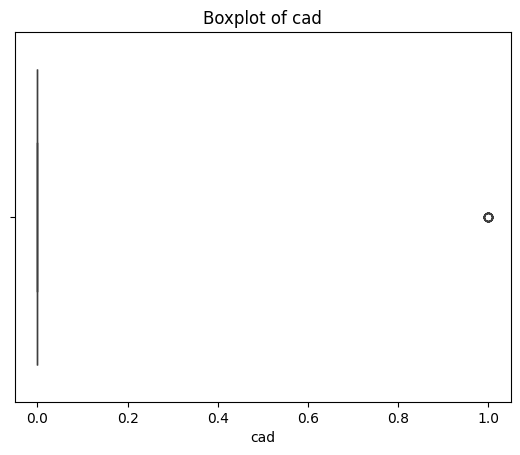

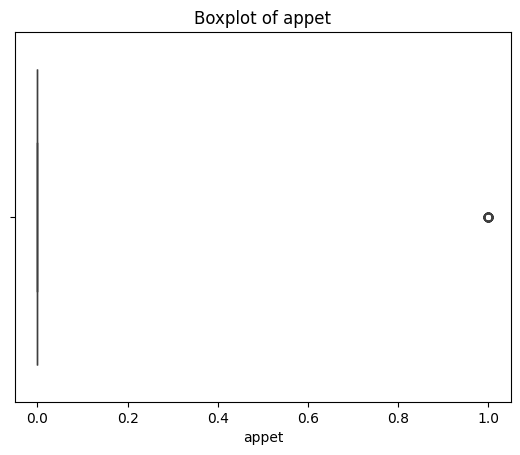

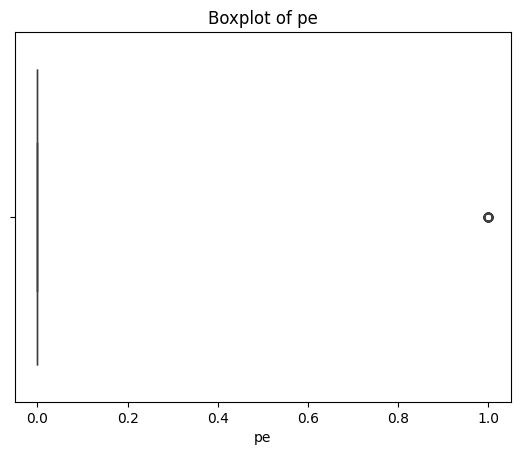

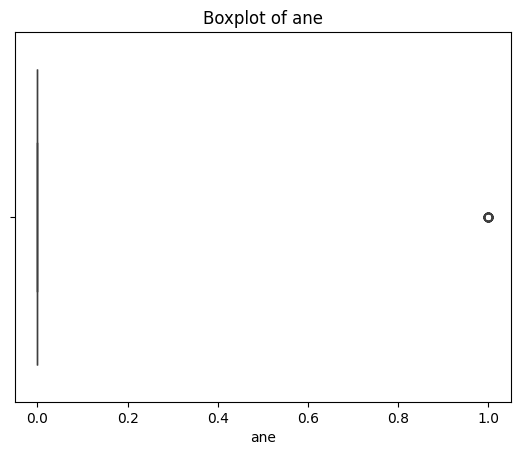

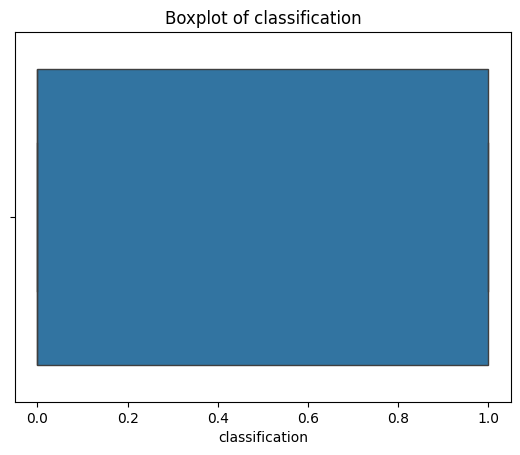

In [19]:
# Boxplots
for col in numerical_cols:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [20]:
# Frequency of categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"{col} value counts:")
    print(data[col].value_counts())
    print("\n")


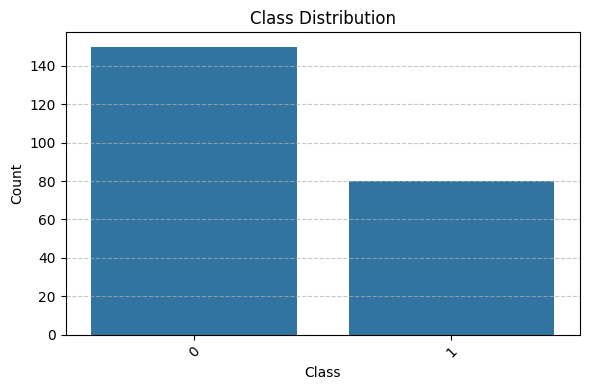

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'classification' with your actual target column if it's different
target_col = 'classification'

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [3]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

<ipython-input-3-6ae90230cd2e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-3-6ae90230cd2e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [24]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [25]:
X = data.drop(['id', 'classification'], axis=1)  # Drop 'id' and target column
y = data['classification']  # Target column

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.9782608695652174


In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)

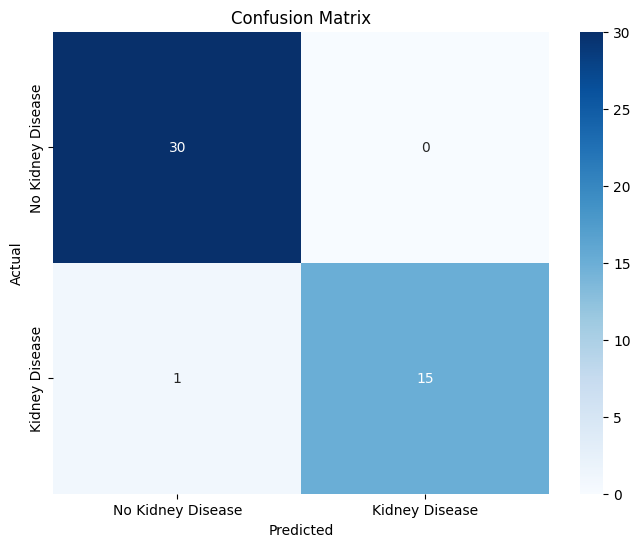

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Kidney Disease", "Kidney Disease"],
            yticklabels=["No Kidney Disease", "Kidney Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Kidney Disease", "Kidney Disease"]))



Classification Report:
                   precision    recall  f1-score   support

No Kidney Disease       0.97      1.00      0.98        30
   Kidney Disease       1.00      0.94      0.97        16

         accuracy                           0.98        46
        macro avg       0.98      0.97      0.98        46
     weighted avg       0.98      0.98      0.98        46



In [33]:
import joblib

# Save the model
joblib.dump(model, 'kidney_model.pkl')


['kidney_model.pkl']